<!-- Student -->
# Introduction to Computational Physics - Week 10 ##
<!-- ToC -->

<!-- Student -->
## Table of contents week 10
  
Introduction to Computational Physics - Week 10: [>>](#Introduction-to-Computational-Physics---Week-10)  
-Table of contents week 10: [>>](#Table-of-contents-week-10)  
-Introduction to week 10: [>>](#Introduction-to-week-10)  
-Generating random numbers using numpy: [>>](#Generating-random-numbers-using-numpy)  
--Week 10 exercise 1: [>>](#Week-10-exercise-1)  
--Week 10 exercise 1 answer: [>>](#Week-10-exercise-1-answer)  
--Week 10 exercise 2: [>>](#Week-10-exercise-2)  
--Week 10 exercise 2 answer: [>>](#Week-10-exercise-2-answer)  
-More random number generators: [>>](#More-random-number-generators)  
--Poisson distribution: [>>](#Poisson-distribution)  
--Normal distribution: [>>](#Normal-distribution)  
-Monte Carlo models: [>>](#Monte-Carlo-models)  
--Week 10 exercise 3: [>>](#Week-10-exercise-3)  
--Week 10 exercise 3 answer: [>>](#Week-10-exercise-3-answer)  
--An aside - Gaussian approximation to Poisson distribution: [>>](#An-aside---Gaussian-approximation-to-Poisson-distribution)  
-Calculating pi using random numbers: [>>](#Calculating-pi-using-random-numbers)  
--Week 10 exercise 4: [>>](#Week-10-exercise-4)  
--Week 10 exercise 4 answer: [>>](#Week-10-exercise-4-answer)  
--Week 10 exercise 5: [>>](#Week-10-exercise-5)  
--Week 10 exercise 5 answer: [>>](#Week-10-exercise-5-answer)  
-Summary of week 10: [>>](#Summary-of-week-10)  
-Week 10 marks: [>>](#Week-10-marks)  

<!-- Student -->
## Introduction to week 10

This week, we shall have a first look at how we can generate random numbers in Python programs and how these can be used to create Monte Carlo models and solve physical and mathematical problems.

## Generating random numbers using numpy

In the module `numpy.random`, Python provides a range of tools for generating random numbers. One of the most basic is a way of generating pseudo-random numbers in the $x$ interval $0 \le x \lt 1$, `numpy.random.rand`, is described [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand). We will look at this routine first, as it is a good way of seeing some of the properties of random number generators. It can be used as follows:

In [1]:
# <!-- Student -->
import numpy as np
#
# generate one random number
x = np.random.rand()
print("x = ",x)
#
# generate an array of 4 random numbers
x1D = np.random.rand(4)
print(" ")
print("x1D = \n",x1D)
#
# generate a 2D array containing 3 rows and 2 columns of random numbers 
x2D = np.random.rand(3, 2)
print(" ")
print("x2D = \n",x2D)

x =  0.6036351516316226
 
x1D = 
 [0.68196423 0.56872796 0.54978078 0.46475478]
 
x2D = 
 [[0.05972415 0.75990254]
 [0.5153499  0.64757888]
 [0.68581896 0.30499897]]


<!-- Student -->
The routine `np.random.rand` uses the [Mersenne Twister algorithm](https://en.wikipedia.org/wiki/Mersenne_Twister), which (in the Numpy implementation) produces 53-bit precision `floats` and has a period of $2^{19937}-1$. The algorithm is started with a _seed_, which you can specify as below. The seed must be an integer between $0$ and $2^{32} - 1$.

### Week 10 exercise 1

Check how the seed works by running the cell below several times for one value of the seed. Note the generated random numbers you get, then change the seed and try again. What do you see?

In [2]:
# <!-- Student -->
#
np.random.seed(1327)
#
# generate one random number
x = np.random.rand()
print("x = ",x)
#
# generate an array of 3 random numbers
x1D = np.random.rand(3)
print(" ")
print("x1D = \n",x1D)

x =  0.5718839411688054
 
x1D = 
 [0.60921443 0.1099518  0.28709095]


<!-- Demo -->
### Week 10 exercise 1 answer

Should get same sequence of numbers for a given seed. Changing the seed results in a different sequence. 

<!-- Student -->
If you don't provide a seed, `np.random.rand` will use something like the time of day as a seed, so you will get a different sequence of numbers every time you use it.

Now let's check that the distribution of numbers we get from `np.random.rand` is what we would expect.

### Week 10 exercise 2

Use the code below to display the distribution of $1000$ random numbers in the interval from 0 to 1 in a histogram with $10$ uniform bins. Then modify the code to make a second histogram to display the distribution resulting from ten million random numbers over the same interval (using the same bin sizes). Explain the differences you observe in the two histograms.

Histogram bins start at 0.0 finish at 1.0
Number of bins is 10 and width of bins is 0.1


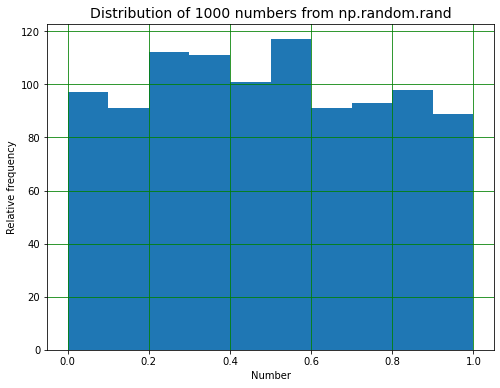

In [3]:
# <!-- Student -->
#
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = 0.0
binTop = 1.0
binNumber = 10
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
randArr = np.random.rand(1000)
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of 1000 numbers from np.random.rand', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
plt.show()

<!-- Demo -->
### Week 10 exercise 2 answer

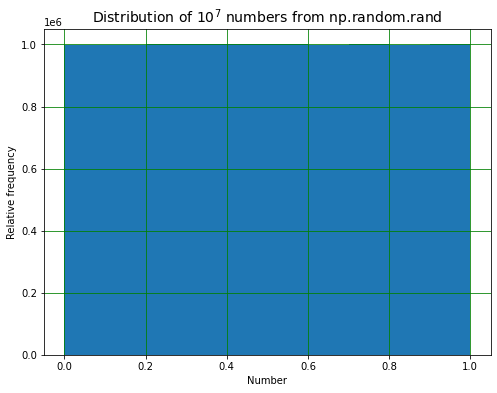

In [4]:
# <!-- Demo -->
#
randArr = np.random.rand(10000000)
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of $10^7$ numbers from np.random.rand', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
#plt.savefig("MersenneTwister.png")
plt.show()

<!-- Demo -->
Errors given roughly by square root of bin contents. One thousand numbers with ten bins will mean roughly $100$ entries per bin and hence errors of around $10$, or 10%, while $10^7$ numbers in $10$ bins will mean about $10^6$ entries per bin and errors of around $1000$, or 0.1%.

<!-- Student -->
## More random number generators

The random number generators available in `numpy.random` are described [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html). We will look at two further generators. 

### Poisson distribution

The routine `random.poisson` produces numbers drawn from a Poisson distribution. This distribution occurs, for example, when the number of cars crossing a line on a road every minute is measured. If the average number per minute is 3.2, the numbers measured in the first, second, third etc. minutes could be 3, 3, 3, 4, 5, 2, 2, 5, 4 and 3. We see that, in contrast to `random.rand`, the numbers produced by `random.poisson` are integers. Their distribution can be shown in a histogram as below.

Histogram bins start at 0.0 finish at 10.0
Number of bins is 10 and width of bins is 1.0
randArr
 [3 5 1 1 2 6 4 2 4 4]


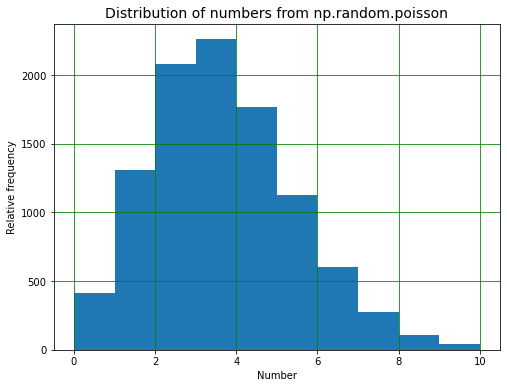

In [5]:
# <!-- Student -->
#
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = 0.0
binTop = 10.0
binNumber = 10
binEdges, binWidth = np.linspace(binBot, binTop, binNumber + 1, retstep = True)
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
lam = 3.2
nEvents = 10000
randArr = np.random.poisson(lam, nEvents)
print("randArr\n",randArr[0:10])
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of numbers from np.random.poisson', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
plt.show()

<!-- Student -->
### Normal distribution

The Normal or Gaussian distribution is obtained using the routine `random.normal`. The numbers produced are floats, and the routine is used as below. 

Histogram bins start at -5.0 finish at 15.0
Number of bins is 20 and width of bins is 1.0
randArr
 [1.4235 6.8667 4.2621 3.3557 3.2712]


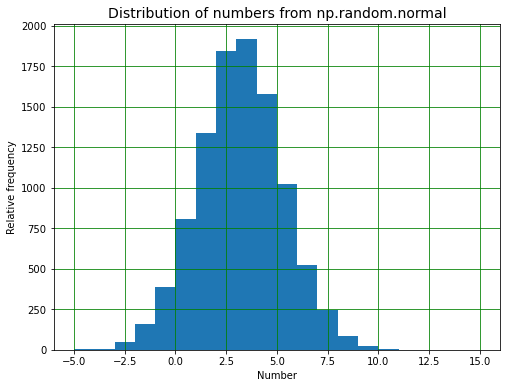

In [6]:
# <!-- Student -->
#
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = -5.0
binTop = 15.0
binNumber = 20
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
mean = 3.2 
RMS = 2.1
nEvents = 10000
randArr = np.random.normal(mean, RMS, nEvents)
np.set_printoptions(precision = 4)
print("randArr\n",randArr[0:5])
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of numbers from np.random.normal', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
plt.show()

<!-- Student -->
## Monte Carlo models

Random numbers can be used to produce computer models which descibe physics experiments or other problems. These are usually (for obvious reasons!) called Monte Carlo models. From the discussion above, it is clear that a simple example would be to use  the Poisson generator to model situations like the number of cars passing through the Mersey tunnel every minute, or the number of salmon swimming up a stream every day. If the average number in the required time interval is known, the Poisson distribution will give a sequence of numbers (of cars or fish) as expected in real life. A model based on this idea could then be used to find out if a queue is likely to form in the tunnel, or how many bears the stream is likely to be able to feed. (Interestingly, having caught their salmon, the bears retire to the nearest woods, eat most of their fish and indulge in another activity for which they are renowned. The resulting transfer of nutrients from stream to forest has been found to be essential to maintaining the local flora in some parts of the world - see the [Salmon Forest Project](http://web.uvic.ca/~reimlab/salmonforest.html) for more information!)

Let's look at an example which is closer to home.

Records made by the Royal Liverpool Hospital staff show that, during the winter months, an average of 27 people require a bed in A&E each day. After one day, all A&E patients are moved to other wards. The hospital management have asked you to work out how many beds must be available to ensure that they never run out of spaces in A&E.

This statement is typical of how a question like this might be phrased, but it needs modification. One problem is the word "never". Even if the hospital were to have an enormous number of A&E beds, there will eventually be a winter in which the number will turn out to be too small! Your first job is to persuade the management team that the question has to be how many beds do we need to make sure we don't run out of spaces on (say) 99.7% of days.

As shown below, we can use a Monte Carlo model to start to answer this question. What we are doing here is not realistic, as we are ignoring problems like the change in average number of people needing a bed with weather conditions, the occurrence of Liverpool and Everton football matches, what happens when the other wards in the hospital are full and someone has to stay in A&E for two days etc. It does, however, illustrate how useful Monte Carlo modelling can be in this kind of situation.

First, generate the numbers of patients expected per day during one winter (91 days) and check that this looks sensible by plotting it!

binNumber 16
Histogram bins start at 0.0 finish at 67
Number of bins is 16 and width of bins is 4.1875
Bin centres are:
 [ 2.0938  6.2812 10.4688 14.6562 18.8438 23.0312 27.2188 31.4062 35.5938
 39.7812 43.9688 48.1562 52.3438 56.5312 60.7188 64.9062]
 


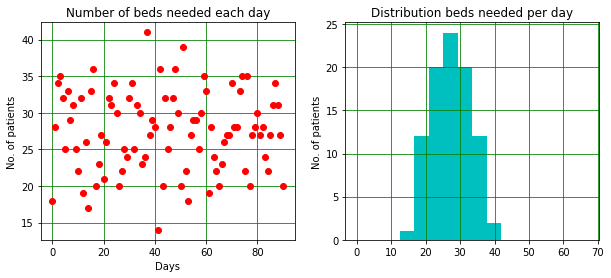

In [7]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
# Average number of patients per day
nPatsDay = 27
#
# Nmber of days in winter
nDays = 91
tArray = np.linspace(0, nDays - 1, nDays)
#
# Number of patients per day (i.e. number of beds needed per day), assuming Poisson dist. 
patsPerDay = np.random.poisson(nPatsDay, nDays) #
#
# Plot number of beds needed each day and the distribution of number of beds needed per day
binBot = 0.0
binTop = int(2.5*nPatsDay)
binNumber = int((binTop - binBot)//4)
print("binNumber",binNumber)
binEdges, binWidth = np.linspace(binBot, binTop, binNumber + 1, retstep = True)
binCentres = (binEdges[1:binNumber + 1] + binEdges[0:binNumber])/2 
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
print("Bin centres are:\n",binCentres)
print(" ")
#
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.title("Number of beds needed each day")
plt.xlabel("Days")
plt.ylabel("No. of patients")
plt.plot(tArray, patsPerDay, color = 'r', linestyle = '', marker = 'o')
plt.grid(color = 'g')
#
plt.subplot(1, 2, 2)
plt.title("Distribution beds needed per day")
plt.hist(patsPerDay, bins = binEdges, color = 'c')
plt.ylabel("Relative frequency")
plt.ylabel("No. of patients")
plt.grid(color = 'g')
#
plt.show()

<!-- Student -->
Now add up the number of beds needed each day and test how often the total exceeds the number available, for a range of numbers of available beds.

 
Number of beds available 	 No days one or more patients has no bed
		 0 				 91
		 5 				 91
		 10 				 91
		 15 				 90
		 20 				 78
		 25 				 58
		 30 				 29
		 35 				 5
		 40 				 1
		 45 				 0
		 50 				 0
		 55 				 0
		 60 				 0
		 65 				 0


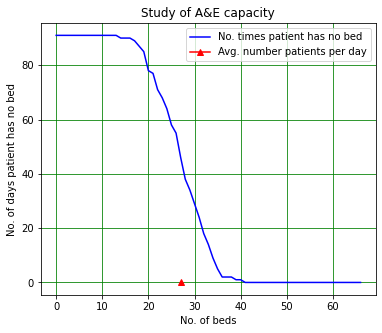

In [8]:
# <!-- Student -->
#
maxBedNumber = int(2.5*nPatsDay)
noBedArr = np.zeros(maxBedNumber)
print(" ")
print("Number of beds available \t No days one or more patients has no bed")
for nBeds in range(0, maxBedNumber):
    nWithoutBed = np.sum(patsPerDay > nBeds)
    noBedArr[nBeds] = nWithoutBed
    if nBeds%5 == 0:
        print("\t\t {:d} \t\t\t\t {:d}".format(nBeds, nWithoutBed))
#
bedNumberArr = np.linspace(0, maxBedNumber - 1, maxBedNumber)
#
plt.figure(figsize = (6, 5))
plt.title("Study of A&E capacity")
plt.xlabel("No. of beds")
plt.ylabel("No. of days patient has no bed")
plt.plot(bedNumberArr, noBedArr, color = 'b', label = "No. times patient has no bed")
plt.plot(nPatsDay, 0.0, color = 'r', marker = '^', label = "Avg. number patients per day")
plt.legend()
plt.grid(color = 'g')
plt.show()

<!-- Student -->
### Week 10 exercise 3

Add comments to the code above. Explain in particular what each line of the code in the `for` loop is doing!

<!-- Demo -->
### Week 10 exercise 3 answer

 
Number of beds available 	 No. days one or more patients has no bed
		 0 				 91
		 5 				 91
		 10 				 91
		 15 				 90
		 20 				 78
		 25 				 58
		 30 				 29
		 35 				 5
		 40 				 1
		 45 				 0
		 50 				 0
		 55 				 0
		 60 				 0
		 65 				 0


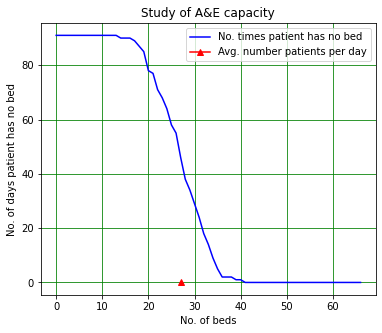

In [9]:
# <!-- Demo -->
#
# Set maximum number of beds
maxBedNumber = int(2.5*nPatsDay)
#
# Array of numbers of times there are no beds available
noBedArr = np.zeros(maxBedNumber)
print(" ")
print("Number of beds available \t No. days one or more patients has no bed")
#
# Loop over possible numbers of beds
for nBeds in range(0, maxBedNumber):
    #
    # Calculate the number of times one or more patients has no bed. The condition patsPerDay > nBeds is True whenever this
    # occurs. Adding up the number of Trues in the arrays (True = 1) gives the number of times this has occurred in the 
    # winter under study.
    nWithoutBed = np.sum(patsPerDay > nBeds)
    #
    # Save the value to it can be plotted
    noBedArr[nBeds] = nWithoutBed
    #
    # Provide a printout every time nBeds is divisible by 5.
    if nBeds%5 == 0:
        print("\t\t {:d} \t\t\t\t {:d}".format(nBeds, nWithoutBed))
#
# Create an array containing the numbers of beds available for the plot.
bedNumberArr = np.linspace(0, maxBedNumber - 1, maxBedNumber)
#
plt.figure(figsize = (6, 5))
plt.title("Study of A&E capacity")
plt.xlabel("No. of beds")
plt.ylabel("No. of days patient has no bed")
plt.plot(bedNumberArr, noBedArr, color = 'b', label = "No. times patient has no bed")
plt.plot(nPatsDay, 0.0, color = 'r', marker = '^', label = "Avg. number patients per day")
plt.legend()
plt.grid(color = 'g')
plt.show()

<!-- Student -->
Both this plot and the histogram of the number of patients arriving per day show us that something like 35...45 beds are needed in this winter. But what happens next winter? And the winter after that? We need to extend the model to look at the situation over several years if we want to check that the number of occasions on which we run out of beds is small.

Histogram bins start at 0.0 finish at 67
Number of bins is 67 and width of bins is 1.0
Bin centres are:
 [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5]
 
Too few beds on 238 days in total of 91000 days (proportion 2.6154e-03).
That is, enough beds on 90762 days (proportion 9.9738e-01).
 
Mean 27.000, RMS 5.196.
Mean + 3*RMS 42.588.
 


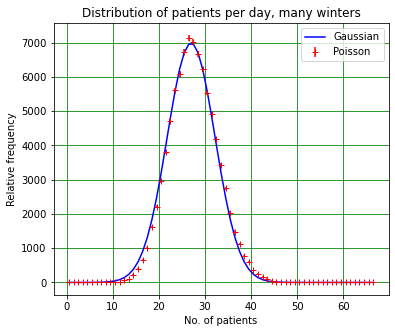

In [10]:
# <!-- Student -->
#
# Can use finer bins as have lots more events
binBot = 0.0
binTop = int(2.5*nPatsDay)
binNumber = int(binTop - binBot)
binEdges, binWidth = np.linspace(binBot, binTop, binNumber + 1, retstep = True)
binCentres = (binEdges[1:binNumber + 1] + binEdges[0:binNumber])/2 
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
print("Bin centres are:\n",binCentres)
#
nWinters = 1000
summedHist = np.zeros(binNumber)
#
for winter in range(0, nWinters):
    patsPerDay = np.random.poisson(nPatsDay, nDays)
    histThisWinter, bins = np.histogram(patsPerDay, bins = binEdges)
    summedHist = summedHist + histThisWinter
#
bedNumberArr = np.linspace(0, maxBedNumber - 1, maxBedNumber)
#
totalDays = nWinters*nDays
numberOfBeds = 43
daysTooFewBeds = np.sum(summedHist[numberOfBeds:maxBedNumber]).astype(int)
daysEnoughBeds = totalDays -  daysTooFewBeds
propTooFewBeds = daysTooFewBeds/totalDays
propEnoughBeds = daysEnoughBeds/totalDays
print(" ")
print("Too few beds on {:d} days in total of {:d} days (proportion {:5.4e}).".format(daysTooFewBeds, totalDays, propTooFewBeds))
print("That is, enough beds on {:d} days (proportion {:5.4e}).".format(daysEnoughBeds, propEnoughBeds))
#
mean = nPatsDay
RMS = np.sqrt(nPatsDay)
norm = nWinters*nDays
gaussArr = norm/(np.sqrt(2*np.pi)*RMS)*np.exp(-(binCentres - mean)**2/(2*RMS**2))
print(" ")
print("Mean {:5.3f}, RMS {:5.3f}.".format(nPatsDay, RMS))
print("Mean + 3*RMS {:5.3f}.".format(nPatsDay+3*RMS))
print(" ")
#              
plt.figure(figsize = (6, 5))
plt.title("Distribution of patients per day, many winters")
plt.ylabel("Relative frequency")
plt.xlabel("No. of patients")
plt.errorbar(binCentres, summedHist/binWidth, yerr = np.sqrt(summedHist)/binWidth, 
             linestyle = '', marker = '+', color = 'r', label = 'Poisson')
plt.plot(binCentres, gaussArr, color = 'b', label = 'Gaussian')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
Now we see that about $43$ beds are needed. In fact, as calculated above, with this number of beds the probablility of there being too few beds on a given day is about 0.3%.

### An aside - Gaussian approximation to Poisson distribution

We also see that the Poisson distribution with mean $\lambda$ looks very like a Gaussian with the same mean ($\mu = \lambda$) and  standard deviation $\sigma = \sqrt {\lambda}$. This is true, provided that $\lambda$ is not too small. (A rule of thumb that is sometimes used is $\lambda > 20$, but what "too small" really means depends on the accuracy of the approximation you need!) The probability that $x$ lies within $3\sigma$ of the mean for a Gaussian $\rm{Prob}(\mu - 3\sigma < x < \mu + 3\sigma) = 0.9973$, so the probability of getting a result which is larger than the mean (i.e. the upper half of the distrubution only) by more than $3\sigma$ is $\frac{1 - 0.9973}{2} = 0.0013$. The number of $43$ beds is roughly $\mu + 3\sigma$, so we would expect the probability of there being too few beds to be roughly 0.13%. Given the approximations involved, the agreement with the above result is reasonable, and from the graph we can see that the Poisson distribution lies above the Gaussian approximation in the region around 40, so we would expect the 0.13% to be an underestimate, as is indeed the case.

<!-- Student -->
## Calculating pi using random numbers

Random numbers can be used to solve a large range of problems, including determining the value of $\pi$. This is a method that might have been used by ancient mathematicians in Persia...though I have no idea whether they actually tried it!

Spread out a square blanket of size $2 \times 2\,$m$^2$ on some flat ground. Mark out a circle of radius $1\,$m on the blanket, with the centre of the circle at the centre of the blanket. Now, from some distance, throw rice at the blanket so that the grains are spread uniformly over it. Count the grains that have fallen in the circle, $N_C$, and the total number of grains on the blanket, $N$. 

As the distribution of rice grains is uniform, the number in the circle and on the blanket is proportional to their respective areas. This means:

\begin{align*}
\frac{N_C}{N} &= \frac{\pi \times 1^2}{2 \times 2}\\ 
  &= \frac{\pi}{4}.
\end{align*}

We can therefore calculate the value of $\pi$ by dividing the number of grains in the circle by the number on the blanket and multiplying by $4$:

$$
\pi = 4\frac{N_C}{N}.
$$

As the only time rice is thrown in Liverpool is at weddings, where there aren't too many people whose primary interest is determining the value of $\pi$, we will use a random number generator to simulate this experiment.

In [11]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nGrains = 10000
riceX = np.random.rand(nGrains)
riceY = np.random.rand(nGrains)
riceR = np.sqrt(riceX**2 + riceY**2)
nCircle = np.sum(riceR < 1)
pi = 4*nCircle/nGrains
print(" ")
print("Number of grains on blanket {:d}, number in circle {:d}.".format(nGrains, nCircle))
print("Value of pi is approximately {:6.5f}".format(pi))

 
Number of grains on blanket 10000, number in circle 7811.
Value of pi is approximately 3.12440


<!-- Student -->
Now let's determine the error we expect on our value of $\pi$. This is a bit trickier than you might expect. We first write the ratio in terms of the independent quantities $N_C$, the number of grains in the circle and $N_{\bar C} = N - N_C$, the number not in the circle:

$$
\pi = 4\frac{{{N_C}}}{{{N}}} = 4\frac{{{N_C}}}{{{N_C} + {N_{\bar C}}}}.
$$

The standard error propagation formula states:

$$
(\Delta \pi )^2 = {\left( {\frac{{\partial \pi }}{{\partial {N_C}}}\Delta {N_C}} \right)^2} + {\left( {\frac{{\partial \pi }}{{\partial {N_{\bar C}}}}\Delta {N_{\bar C}}} \right)^2}.
$$

Using the formula for the derivative of a quotient, the partial derivatives are:

$$
\frac{{\partial \pi }}{{\partial {N_C}}} = 4\frac{{({N_C} + {N_{\bar C}}) - {N_C}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} = 4\frac{{{N_{\bar C}}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} = 4\frac{{{N_{\bar C}}}}{{{N}^2}}
$$

and

$$
\frac{{\partial \pi }}{{\partial {N_{\bar C}}}} = 4\frac{{ - {N_C}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} =  - 4\frac{{{N_C}}}{{{N}^2}}.
$$

As $\Delta N_C$ and $\Delta N_{\bar C}$ are $\sqrt N_C$ and $\sqrt N_{\bar C}$, respectively, we have:

\begin{align*}
{(\Delta \pi )^2} &= {\left( {\frac{{4{N_{\bar C}}}}{{{N^2}}}} \right)^2}{N_C} + {\left( {\frac{{4{N_C}}}{{{N^2}}}} \right)^2}{N_{\bar C}}\\
 &= \frac{{{4^2}}}{{{N^4}}}{N_{\bar C}}{N_C}\left( {{N_{\bar C}} + {N_C}} \right)\\
 &= \frac{{{4^2}}}{N}\frac{{{N_C}}}{N}\frac{{{N_{\bar C}}}}{N}.
\end{align*}

Using $p = \frac{N_C}{N}$, the probability of a grain landing in the circle, and $q = 1 - p = \frac{N_{\bar C}}{N}$, the probability that it doesn't land in the circle, we get:

\begin{align}
(\Delta \pi )^2 &= \frac{4^2}{N}pq \\
\Rightarrow \Delta \pi  &= 4\sqrt {\frac{pq}{N}}.
\end{align}

### Week 10 exercise 4 

Determine the error you expect on the rice grain measurement of $\pi$. (Copy the code above into the cell below this one and add your error calculation to it.) Is the measurement consistent with the known value?

<!-- Demo -->
### Week 10 exercise 4 answer

In [12]:
# <!-- Demo -->
#
nGrains = 10000
riceX = np.random.rand(nGrains)
riceY = np.random.rand(nGrains)
riceR = np.sqrt(riceX**2 + riceY**2)
nCircle = np.sum(riceR < 1)
pi = 4*nCircle/nGrains
Dpi = 4*np.sqrt(nCircle/nGrains*(1 - nCircle/nGrains)/nGrains)
consistency = abs(pi - np.pi)/Dpi
print(" ")
print("Number of grains on blanket {:d}, number in circle {:d}.".format(nGrains, nCircle))
print("Value of pi is {:8.7f} +- {:8.7f}.".format(pi, Dpi))
print("Deviation in terms of error {:8.7f}.".format(consistency))
if consistency < 3:
    print("Calculated value of pi is consistent with expectation.")
else:
    print("Calculated value of pi is not consistent with expectation.")

 
Number of grains on blanket 10000, number in circle 7843.
Value of pi is 3.1372000 +- 0.0164523.
Deviation in terms of error 0.2669936.
Calculated value of pi is consistent with expectation.


<!-- Student -->
### Week 10 exercise 5

In the cell below, we look at how the precision of the value of $\pi$ increases as we increase the number of grains of rice. Unfortunately, there is an error in the code: find it and fix it!

In [13]:
# <!-- Student -->
#
minGrains = 100
maxGrains = 10000
nSteps = 50
grainArr = np.linspace(minGrains, maxGrains, nSteps)
piArr = np.zeros(nSteps)
DpiArr = np.zeros(nSteps)
#
for n in range(0, nSteps):
    riceX = np.random.rand(grainArr[n])
    riceY = np.random.rand(grainArr[n])
    riceR = np.sqrt(riceX**2 + riceY**2)
    nCircle = np.sum(riceR < 1)
    piArr[n] = 4*nCircle/grainArr[n]
    DpiArr[n] = 4*np.sqrt(nCircle/grainArr[n]*(1 - nCircle/grainArr[n])/grainArr[n])
#
plt.figure(figsize = (10,4))
plt.title("$\pi$ value with number of grains")
plt.xlabel("Number of grains")
plt.ylabel("Value of $\pi$")
plt.errorbar(grainArr, piArr, yerr = DpiArr, color = 'r', marker = '.', linestyle = '')
plt.plot(grainArr, np.pi*np.ones(nSteps), color = 'b', marker = '', linestyle = '-')
plt.grid(color = 'g')
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

<!-- Demo -->
### Week 10 exercise 5 answer

The problem is that grainArr is not an array of integers. There are two possible solutions in the code below!

grainArr
 [100 302 504 706 908]


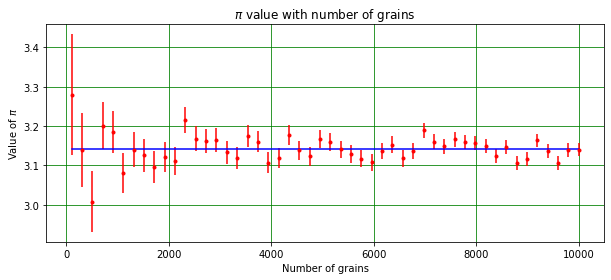

In [14]:
# <!-- Demo -->
#
minGrains = 100
maxGrains = 10000
nSteps = 50
#
# The problem is that grainArr is not an array of integers. Solve most easily by forcing the values to 
# be integers. Either do this:
grainArr = np.int_(np.linspace(minGrains, maxGrains, nSteps))
# Or this:
grainArr = np.linspace(minGrains, maxGrains, nSteps).astype(int)
print("grainArr\n",grainArr[0:5])
piArr = np.zeros(nSteps)
DpiArr = np.zeros(nSteps)
#
for n in range(0, nSteps):
    riceX = np.random.rand(grainArr[n])
    riceY = np.random.rand(grainArr[n])
    riceR = np.sqrt(riceX**2 + riceY**2)
    nCircle = np.sum(riceR < 1)
    piArr[n] = 4*nCircle/grainArr[n]
    DpiArr[n] = 4*np.sqrt(nCircle/grainArr[n]*(1 - nCircle/grainArr[n])/grainArr[n])
#
plt.figure(figsize = (10, 4))
plt.title("$\pi$ value with number of grains")
plt.xlabel("Number of grains")
plt.ylabel("Value of $\pi$")
plt.errorbar(grainArr, piArr, yerr = DpiArr, color = 'r', marker = '.', linestyle = '')
plt.plot(grainArr, np.pi*np.ones(nSteps), color = 'b', marker = '', linestyle = '-')
plt.grid(color = 'g')
plt.show()

<!-- Student -->
## Summary of Week 10

This week, we have seen some of the tools Python provides for generating random numbers and looked at a couple of examples illustrating how these can be used. Our illustrations were simple, but some Monte Carlo models are extremely complex. For example, the ATLAS collaboration working on the Large Hadron Collider (LHC) at CERN use a Monte Carlo program consisting of about 250 thousand lines of code. This program, described [here](https://arxiv.org/pdf/1005.4568.pdf), allows them to compare the measurements they make with their detector with theoretical expectations. The Monte Carlo simulates the interactions you would expect to see given the theory and then simulates the signatures you would expect to see in the detector when the particles from those interactions pass through it. It is no exaggeration to say that it would be impossible to perform experiments like ATLAS without random number generators and Monte Carlo programs. 

<!-- Demo -->
## Week 10 marks

|Exercise   | Mark    | Comments                                                                         |
|-----------|---------|----------------------------------------------------------------------------------|
| 1         | 1       |                                                                                  |
| 2         | 2       |                                                                                  |
| 3         | 3       | Try and help them understand *nWithoutBed = np.sum(patsPerDay > nBeds)*          |
| 4         | 2       |                                                                                  |
| 5         | 2       |                                                                                  |
| **Total** | **10**  |                                                                                  |